# **Лабараторная работа 2**


**Суть** - векторизовать контент статьи и кластеризовать данные

*  *Этап 1 - нормализация*

С помощью библиотеки natasha или pymorphy 2 - преобразовать текст в нормальную форму, выбросить стоп-слова


*  *Этап 2 - веткоризация*
Используйте 1 из представленных способов

CountVectorizer (sklearn)
TFIDFVectrorizer (sklearn)
Word2Vec (gensim)


 * *Этап 3 - Сжатие векторов*

С помощью PCA - сжать векторы до 2-точек, для построения кластеров


 * *Этап 4 - клатеризация*

использовать KMeans
Использовать DBSSCAN


 * *Этап 5 - результаты анализа*

Выделить темы, по которым были построены кластеры

# **Этап №1: Нормализация**

In [3]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=be47186b66d8efbf2dc7766fc59e27602381c39489b28b19687b52133c6e4127
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=5b879b090cdbc3214a89045a82a80763eb51a735e49ff78f5ef85cd47948aa1c
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [9]:
import json
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, Doc
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Загружаем JSON файл
with open('articles.json', 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Инициализация Natasha компонентов
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in ENGLISH_STOP_WORDS and token.lemma.isalpha():
            tokens.append(token.lemma)
    return ' '.join(tokens)

# Нормализация всех статей
normalized_articles = [normalize_text(article['content']) for article in articles]
# Выводим несколько примеров нормализованных текстов
print("Примеры нормализованных текстов:")
for i, norm_text in enumerate(normalized_articles[:3]):
    print(f"Статья {i+1}: {norm_text}\n")

Примеры нормализованных текстов:
Статья 1: теперь у мы быть и видео при перепечатка текст либо иной использование текстовый материал с настоящий сайт на иной ресурс в сеть интернет гиперссылка на источник обязательный фотография видеоматериал иной иллюстрация мочь быть использовать только с обязательный указание автор и источник заимствование

Статья 2: причина утрата доверие к депутат и случиться не сам по себя а по иск прокуратура тигильский район который провести глава регион раскритиковать дорожник за плохой содержание хасанский трасса вызывать нарекание как житель так и гость край поскольку именно этот очередной инициатива администрация город носить сомнительный характер озеленение улица привести к зауживание проезжий часть в владивосток активно продолжаться политика озеленение вы мочь получить до миллион рубль на погашение ипотека при рождение третий и последующий ребенок выплата складываться из средство бюджет новый дата утвердить с учет график проведение международный мероприят

# **Этап №2: Векторизация**

Мы будем использовать TFIDFVectorizer из библиотеки sklearn.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(normalized_articles)

# Выводим примеры векторов
print("Примеры векторов TF-IDF (первые 3 статьи):")
print(X[:3].toarray())

# Выводим статистику по векторам
mean_vector = np.mean(X.toarray(), axis=0)
std_vector = np.std(X.toarray(), axis=0)
print("Среднее значение по векторам TF-IDF:")
print(mean_vector)
print("Стандартное отклонение по векторам TF-IDF:")
print(std_vector)

Примеры векторов TF-IDF (первые 3 статьи):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Среднее значение по векторам TF-IDF:
[0.00545454 0.00094651 0.00126876 0.00545454 0.00126876 0.00220434
 0.005081   0.00983383 0.025134   0.00149849 0.01250068 0.00355395
 0.00451897 0.00548039 0.00619679 0.0068269  0.00437784 0.00639764
 0.00374062 0.00669868 0.00188886 0.00354559 0.00759531 0.01204191
 0.00401525 0.00940586 0.00085496 0.00865476 0.0028664  0.00542495
 0.00609994 0.00330501 0.00302331 0.00199492 0.00433298 0.00330651
 0.00794772 0.00223384 0.00649947 0.00710941 0.00832519 0.00906095
 0.00339601 0.00343992 0.00904851 0.01820283 0.00408568 0.0048385
 0.00396874 0.0048311  0.00216984 0.00223384 0.00085496 0.00655959
 0.00706884 0.06080464 0.00584621 0.01228824 0.00173469 0.01330063
 0.00531405 0.00305445 0.00355503 0.00384162 0.00276739 0.0028482
 0.03107041 0.00467753 0.00766728 0.00612    0.006463   0.01085773
 0.00547371 0.01121892 0.01936918 0.025023

# **Этап №3: Сжатие векторов**

Используем PCA для уменьшения размерности векторов до 2.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Выводим сжатые векторы
print("Примеры сжатых векторов после PCA (первые 3 статьи):")
print(X_reduced[:3])

# Выводим объясненную дисперсию для компонентов PCA
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия для компонентов PCA:")
print(explained_variance)
print(f"Суммарная объясненная дисперсия: {np.sum(explained_variance)}")

Примеры сжатых векторов после PCA (первые 3 статьи):
[[-0.29126835 -0.3330815 ]
 [-0.11829432 -0.1044285 ]
 [-0.28894848 -0.01351195]]
Объясненная дисперсия для компонентов PCA:
[0.03951925 0.03477316]
Суммарная объясненная дисперсия: 0.0742924068451499


# **Этап №4: Кластеризация**

Мы будем использовать KMeans и DBSCAN из библиотеки sklearn для кластеризации данных.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Кластеры:


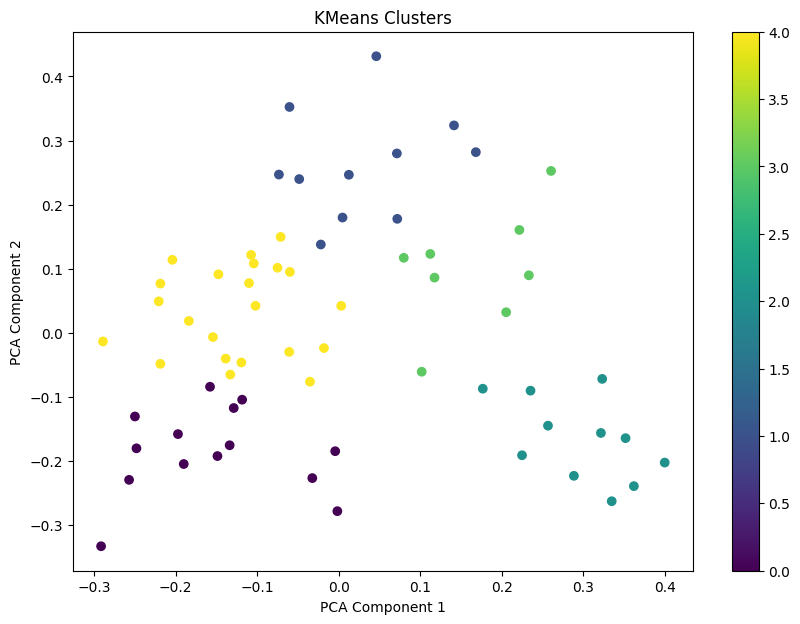

DBSCAN Кластеры:


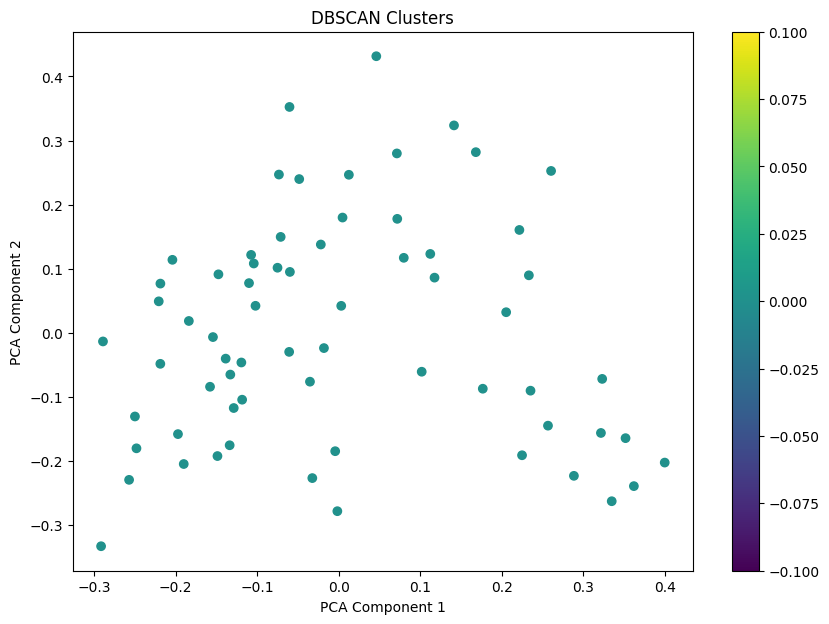

In [7]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# KMeans кластеризация
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)

# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

# Визуализация кластеров
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

print("KMeans Кластеры:")
plot_clusters(X_reduced, kmeans_labels, 'KMeans Clusters')

print("DBSCAN Кластеры:")
plot_clusters(X_reduced, dbscan_labels, 'DBSCAN Clusters')

# **Этап №5: Результаты анализа**

In [8]:
import numpy as np
import pandas as pd

def get_top_terms_per_cluster(vectorizer, X, labels, n_terms=10):
    df = pd.DataFrame(X.todense()).groupby(labels).mean()
    terms = vectorizer.get_feature_names_out()
    for i, row in df.iterrows():
        print(f"\nКластер {i}")
        print(', '.join([terms[t] for t in np.argsort(row)[-n_terms:]]))

print("Ключевые слова для каждого кластера (KMeans):")
get_top_terms_per_cluster(vectorizer, X, kmeans_labels)

Ключевые слова для каждого кластера (KMeans):

Кластер 0
год, транспортный, таможенный, по, дальневосточный, быть, обязательный, источник, иной, на

Кластер 1
весь, это, редакция, тот, который, суд, собака, что, на, не

Кластер 2
суд, иной, преступление, ук, рф, дело, на, уголовный, по, следственный

Кластер 3
но, женщина, район, что, быть, приговор, не, черниговский, на, суд

Кластер 4
край, приморский, для, обязательный, центр, быть, источник, по, иной, на
